Directory

In [1]:
%cd /content/drive/MyDrive/Data Mining/2. Cox Proportional Hazard Regression

/content/drive/MyDrive/Data Mining/2. Cox Proportional Hazard Regression


In [2]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4032 sha256=5adf068bfefd58ad135405a5d9d60c9ad0a33c244720fe0ea72f99f0489d083a
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [7]:
import pandas as pd
import statsmodels.api as sm

Dataset

In [10]:
dataset = pd.read_csv("veteran.csv")
dataset = dataset.dropna()
dataset.head()

,trt,celltype,time,status,karno,diagtime,age,prior
0,1,squamous,72,1,60,7,69,0
1,1,squamous,411,1,70,5,64,10
2,1,squamous,228,1,60,3,38,0
3,1,squamous,126,1,60,9,63,10
4,1,squamous,118,1,70,11,65,10


In [12]:
dataset = pd.get_dummies(dataset, drop_first = True)
dataset.head()

,trt,time,status,karno,diagtime,age,prior,celltype_large,celltype_smallcell,celltype_squamous
0,1,72,1,60,7,69,0,False,False,True
1,1,411,1,70,5,64,10,False,False,True
2,1,228,1,60,3,38,0,False,False,True
3,1,126,1,60,9,63,10,False,False,True
4,1,118,1,70,11,65,10,False,False,True


Cox Proportional Hazard

In [13]:
#CPH model

from lifelines import CoxPHFitter
model = CoxPHFitter(penalizer=0.1)
model.fit(dataset, "time", event_col="status")
model.print_summary()

<lifelines.CoxPHFitter: fitted with 137 total observations, 9 right-censored observations>
             duration col = 'time'
                event col = 'status'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 137
number of events observed = 128
   partial log-likelihood = -479.05
         time fit was run = 2024-08-05 17:01:12 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
trt                  0.26       1.29       0.19            -0.11             0.63                 0.89                 1.87
karno               -0.03       0.97       0.01            -0.04            -0.02                 0.96                 0.98
diagtime             0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
age                 -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01
prior                0.00       1.00       0.02            -0.04             0.04                 0.96                 1.04
celltype_large      -0.56       0.57       0.26            -1.08            -0.04                 0.34                 0.96
celltype_smallcell  -0.12       0.88       0.24            -0.60             0.35                 0.55                 1.41
celltype_squamous   -0.89       0.41       0.26            -1.40            -0.38                 0.25                 0.68

                     cmp to     z      p   -log2(p)
covariate                                          
trt                    0.00  1.36   0.17       2.54
karno                  0.00 -5.54 <0.005      24.95
diagtime               0.00  0.11   0.91       0.13
age                    0.00 -0.58   0.56       0.84
prior                  0.00  0.06   0.95       0.08
celltype_large         0.00 -2.12   0.03       4.89
celltype_smallcell     0.00 -0.52   0.61       0.72
celltype_squamous      0.00 -3.44 <0.005      10.76
---
Concordance = 0.74
Partial AIC = 974.09
log-likelihood ratio test = 52.80 on 8 df
-log2(p) of ll-ratio test = 26.34

Visualization

<Axes: xlabel='log(HR) (95% CI)'>

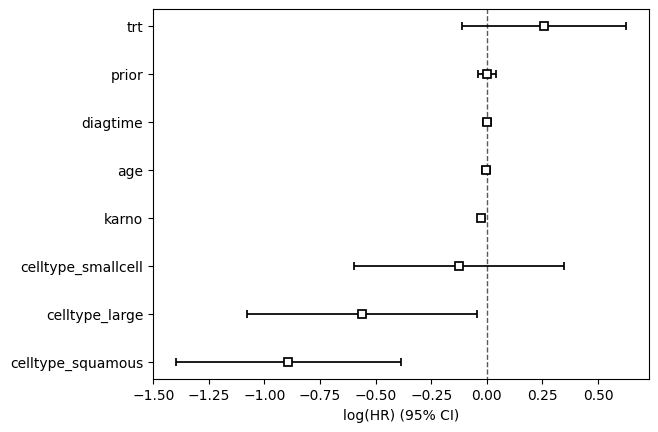

In [14]:
model.plot()